# IfcLibrary dynamic tree
## Definition of the 3D viewer

In [1]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
import importlib

def viewer_3d(vertices, faces):
    c_values=[]
    for i in range(len(vertices)):
    	for j in range(len(vertices[i])):
    		c_values.append(vertices[i][j])

#    lim=abs(max(c_values, key=abs))
    lim=5

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    x = [vertices[i][0] for i in range(len(vertices))]
    y = [vertices[i][1] for i in range(len(vertices))]
    z = [vertices[i][2] for i in range(len(vertices))]

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_xlim(-lim, lim)
    ax.set_ylim(-lim, lim)
    ax.set_zlim(0., lim*2)

    poly3d = []
    for i in range(len(faces)):
        face=[vertices[j] for j in faces[i]]
        poly3d.append(face)
    
#    ax.scatter(x,y,z)
    ax.add_collection3d(Poly3DCollection(poly3d, facecolors='w', linewidths=1, alpha=1))
    ax.add_collection3d(Line3DCollection(poly3d, colors='k', linewidths=0.2, linestyles=':'))

    plt.show()

## Low poly tree object
### Definition

In [2]:
"""
in CrownTaper s  default=0 nested=2
in CrownMaxLoc s  default=0 nested=2
in PlantHeight s default=10.0 nested=2
in TrunkHeight s default=2.0 nested=2
in CrownDiameter s default=4.0 nested=2
in TrunkDiameter s default=.3 nested=2
out verts_3D s
out faces_3D s
out verts_2D s
out edges_2D s
out faces_2D s
"""

#from ifcopenshell.util.shape_builder import ShapeBuilder, V

from math import sin, cos, pi
from random import uniform
import numpy as np

def LowPolyTree(CrownTaper=0.5, CrownMaxLoc=.3, PlantHeight=12.0, TrunkHeight=2.0, CrownDiameter=4, TrunkDiameter=0.3):

    res=6
    CrownHeight=PlantHeight-TrunkHeight

    def circle(center, r, res):
        points=[]
        for i in range(res):
            vert=(cos(i*2*pi/res)*r+center[0], sin(i*2*pi/res)*r+center[1], .0+center[2])
            points.append(vert)
        return(points)

    def merge_lists(lists):
        merged_list=[]
        for i in range(len(lists)):
            merged_list=merged_list+lists[i]
        return(merged_list)

    def XY_scale(vert, scale):
        vert_scaled=(vert[0]*scale, vert[1]*scale, vert[2])
        return vert_scaled

    def rand_add(vert,amp):
        vert_new=(vert[0]+uniform(-amp,amp), vert[1]+uniform(-amp,amp), vert[2]+uniform(-amp,amp))
        return(vert_new)

    HeightSegmentsTrunk=2
    HeightSegmentsCrown=7
    HeightSegmentsTotal=HeightSegmentsTrunk+HeightSegmentsCrown

    verts=[]

    #Trunk
    for i in range(HeightSegmentsTrunk):
       points=circle((.0, .0, i*TrunkHeight), TrunkDiameter/2, res)
       verts.append(points)  

    #Crown
    h_CrownMaxLoc=int((HeightSegmentsCrown-1)*CrownMaxLoc)
    indices=[]
    for i in range(0, h_CrownMaxLoc):
        indices.append(i)
    for i in range(0, HeightSegmentsCrown-h_CrownMaxLoc):
        indices.append(h_CrownMaxLoc-i)
        
    my_min_val = min(indices)
    my_max_val = max(indices)

    NCrownTaper=CrownTaper*.8

    CrownDiameters=[]
    for x in indices:
        CrownDiameters.append(((x-my_min_val)/(my_max_val-my_min_val))*NCrownTaper+(1-NCrownTaper))

    RandomizeAmplitude=PlantHeight/50

    for i in range(0, HeightSegmentsCrown-1):
        points=circle((.0, .0, TrunkHeight+(i+1)*(CrownHeight/HeightSegmentsCrown)), CrownDiameter*CrownDiameters[i]/2, res)
        for i in range(0,len(points)):
            points[i]=rand_add(points[i], RandomizeAmplitude)
        verts.append(points)

    #Top
    verts.append(circle((.0, .0, PlantHeight), .05, res))

    edge_loops=[]
    for i in range(HeightSegmentsTotal):
        edge_loops.append(range(i*res, (i+1)*res))

    verts=merge_lists(verts)

    faces=[]
    bottom=[*edge_loops[0]]
    faces.append(bottom)
    for i in range(HeightSegmentsTotal-1):
        for j in range(res):
            face=(edge_loops[i][j-1], edge_loops[i][j], edge_loops[i+1][j], edge_loops[i+1][j-1])
            faces.append(face)     
    top=[*edge_loops[-1]]
    faces.append(top)

    #verts.append((5.0,0,PlantHeight))
    verts_3D=[verts]
    faces_3D=[faces]

    verts_2D=[[(-0.5865642428398132, 0.8647078275680542, 0.0), (-0.7583824992179871, 0.6572927236557007, 0.0), (-0.7234422564506531, 0.5865941047668457, 0.0), (-0.8714070916175842, 0.46631893515586853, 0.0), (-0.9203394055366516, 0.15792329609394073, 0.0), (-0.6487269997596741, 0.11522211134433746, 0.0), (-0.9273074269294739, 0.0903107076883316, 0.0), (-0.9606701731681824, -0.2852219343185425, 0.0), (-0.8060722351074219, -0.35055163502693176, 0.0), (-0.8271104693412781, -0.4677186608314514, 0.0), (-0.6899875998497009, -0.6695915460586548, 0.0), (-0.6215555667877197, -0.6767659187316895, 0.0), (-0.4315463900566101, -0.8824808597564697, 0.0), (-0.30316293239593506, -0.9023936986923218, 0.0), (-0.32218849658966064, -0.8037619590759277, 0.0), (-0.21792533993721008, -0.9530860185623169, 0.0), (0.36917445063591003, -0.877334475517273, 0.0), (0.30831706523895264, -0.685136079788208, 0.0), (0.4778200685977936, -0.8094909191131592, 0.0), (0.9163193106651306, -0.368840754032135, 0.0), (0.827597439289093, -0.29377281665802, 0.0), (0.9478662610054016, -0.245104119181633, 0.0), (0.9667968153953552, 0.08458180725574493, 0.0), (0.7529001832008362, 0.05212751030921936, 0.0), (0.9102436900138855, 0.19098728895187378, 0.0), (0.8279229998588562, 0.5522171258926392, 0.0), (0.6635335087776184, 0.6461355686187744, 0.0), (0.5753684639930725, 0.8170149326324463, 0.0), (0.3976244330406189, 0.8779193162918091, 0.0), (0.18733686208724976, 0.7513588666915894, 0.0), (0.338344544172287, 0.910933256149292, 0.0), (-0.013130240142345428, 0.9798095226287842, 0.0), (-0.18649885058403015, 0.9414206743240356, 0.0), (-0.3193224370479584, 0.8835403919219971, 0.0)]]
    edges_2D=[]
    faces_2D=[]

    verts_2D_new=[]
    for vert in verts_2D[0]:
        verts_2D_new.append(XY_scale(vert, CrownDiameter/2))

    RangeOfVerts=range(0, len(verts_2D[0]))  
    for i in RangeOfVerts:
        edges_2D.append([RangeOfVerts[i-1],i]) 
        faces_2D.append(i)
        
    verts_2D[0]=verts_2D_new
    edges_2D=[edges_2D]
    faces_2D=[[faces_2D]]
    return verts_2D, edges_2D, faces_2D, verts_3D, faces_3D

verts_2D, edges_2D, faces_2D, verts_3D, faces_3D=LowPolyTree()



### Plan representation

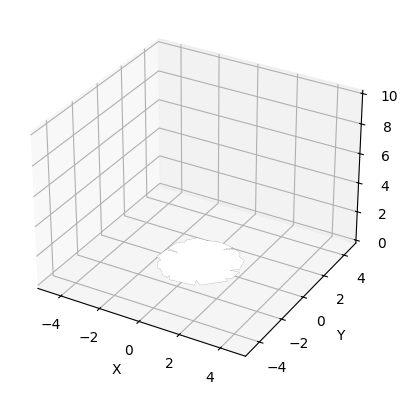

In [3]:
viewer_3d(verts_2D[0], faces_2D[0])

### Model representation

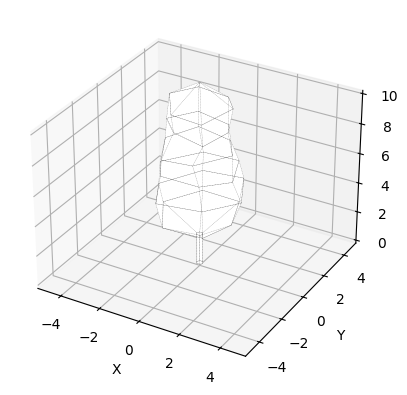

In [4]:
viewer_3d(verts_3D[0], faces_3D[0])